In [13]:
# 데이터 가져오기
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

diabetes = load_diabetes()

In [2]:
diabetes['data'].shape

(442, 10)

In [3]:
diabetes['target'].shape

(442,)

In [4]:
# 모델에 입력할 데이터 X, y 준비하기
df_X = diabetes['data']
df_y = diabetes['target']

type(df_X), type(df_y)

(numpy.ndarray, numpy.ndarray)

In [5]:
# train 데이터와 test 데이터로 분리하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=777)

In [6]:
# 모델 준비하기
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions


In [7]:
# 손실함수 loss 정의하기
def MSE(a, b):
    mse = ((a - b) ** 2).mean() 
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [8]:
# 기울기를 구하는 gradient 함수 구현하기
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    
    return dW, db

In [9]:
# 하이퍼 파라미터인 학습률 설정하기
LEARNING_RATE = 0.01

In [10]:
# 모델 학습하기
losses = []

W = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
b = 0

for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 21113.3616
Iteration 20 : Loss 16088.0456
Iteration 30 : Loss 12730.4752
Iteration 40 : Loss 10486.3122
Iteration 50 : Loss 8985.4765
Iteration 60 : Loss 7980.9003
Iteration 70 : Loss 7307.6390
Iteration 80 : Loss 6855.5748
Iteration 90 : Loss 6551.1919
Iteration 100 : Loss 6345.4109
Iteration 110 : Loss 6205.4658
Iteration 120 : Loss 6109.4820
Iteration 130 : Loss 6042.8555
Iteration 140 : Loss 5995.8369
Iteration 150 : Loss 5961.9172
Iteration 160 : Loss 5936.7509
Iteration 170 : Loss 5917.4369
Iteration 180 : Loss 5902.0385
Iteration 190 : Loss 5889.2626
Iteration 200 : Loss 5878.2459
Iteration 210 : Loss 5868.4120
Iteration 220 : Loss 5859.3761
Iteration 230 : Loss 5850.8813
Iteration 240 : Loss 5842.7559
Iteration 250 : Loss 5834.8856
Iteration 260 : Loss 5827.1937
Iteration 270 : Loss 5819.6290
Iteration 280 : Loss 5812.1576
Iteration 290 : Loss 5804.7565
Iteration 300 : Loss 5797.4104
Iteration 310 : Loss 5790.1092
Iteration 320 : Loss 5782.8460
Iteration 330

In [11]:
# test 데이터에 대한 성능 확인하기
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2350.7601542660564)

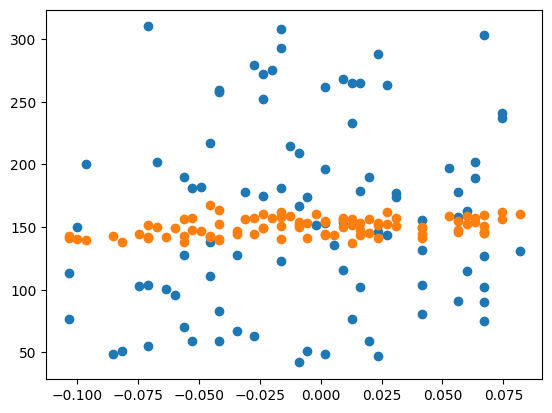

In [ ]:
# 정답 데이터와 예측한 데이터 시각화하기

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()
# LEARNING_RATE = 0.0001, Iteration 100,000
# 결과가 평균에 수렴하나 학습이 정상적으로 된거같지않음

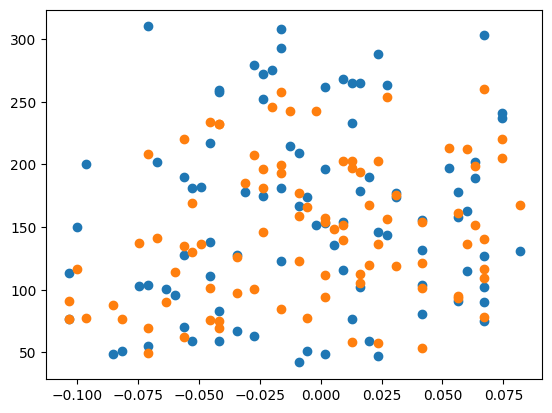

In [15]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()
# LEARNING_RATE = 0.01, Iteration 100,000
# 학습률 조정하니 전체학습 수를 낮춰도 충분히 학습된 모습